# Linear regression
We are going to look at a simple version of linear regression. Following the theame of the descison tree excercise we will assume that there are some 'bad guys' in our adventure game for which we know their level and from this we want to guess their hit points, 'cause this will help us beat them (or something). 

In [1]:
# Some boring imports
from __future__ import division
import random
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline


In [2]:
# Create some data. This is a black box to the machine learning algorithm below.
# It represents all the knowlage that we've learnt from previus battles. It's going to be our training data.

# This function will model our bad guys HP for a given level. It's a y =mx+c but with a bit of random
y_lambda = lambda x:  3 + 0.3 * x + random.randint(math.floor(-0.2*x),math.floor(0.2*x))

# Our traing data, gained from previous battles:
X = range(10,110)
Y = [y_lambda(x) for x in X]

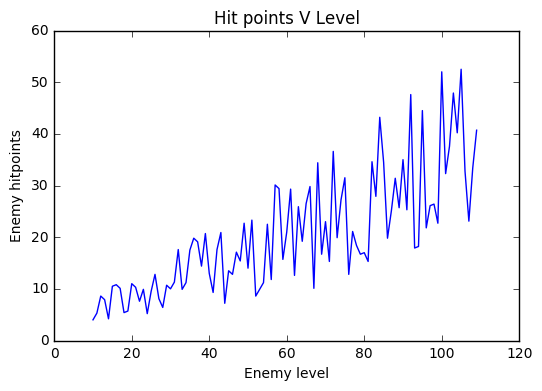

In [3]:
# Ok for our data, "enemy level" on the x (this is what we will know) and 
# "enemy hit points" (this is what we will predict) on the y.
# Let's take a look:

plt.plot(X, Y)
plt.title('Hit points V Level')
plt.ylabel('Enemy hitpoints')
plt.xlabel('Enemy level')
plt.show()

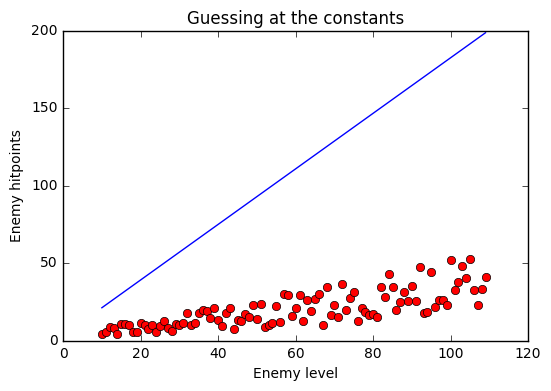

In [4]:
# So our task becomes given we know an enemy's level can we guess their hit points?

# So we are going to make the hypothesis that our data is in the form:
# y = mx +c     // AKA: enemy_hit_points = CONSTANT_1 * enemy_level + CONSTANT_2
# I'm going to rewrite that as:
# y = Theta[0] + Theta[1] * x
# I.e. Theta[0] = c and Theta[1] = m so Theta = [c,m]


# So given an array of x's (enemy levels) we can predict the corresponding y's (hit points)
def hypothesis(X, Theta):
    return [(Theta[0] + Theta[1] * x) for x in X]

# The issue is that we don't know what the two constants are (Theta[0] and Theta[1]).
# We could guess, let's try that.
Theta = [
    random.randrange(0,5) + random.random(),  # A random guess between 0 and 6
    random.random() * 6, # A random guess between 0 and 6
]

# Now let's plot our predictions against our guesses using the above values for the constants.
plt.plot(X,Y, 'ro') # Actuals
plt.plot(X, hypothesis(X, Theta), 'b-') # name="Our guess. Theta=%s"%(Theta,))],
plt.title("Guessing at the constants")
plt.xlabel("Enemy level")
plt.ylabel("Enemy hitpoints")
plt.show()


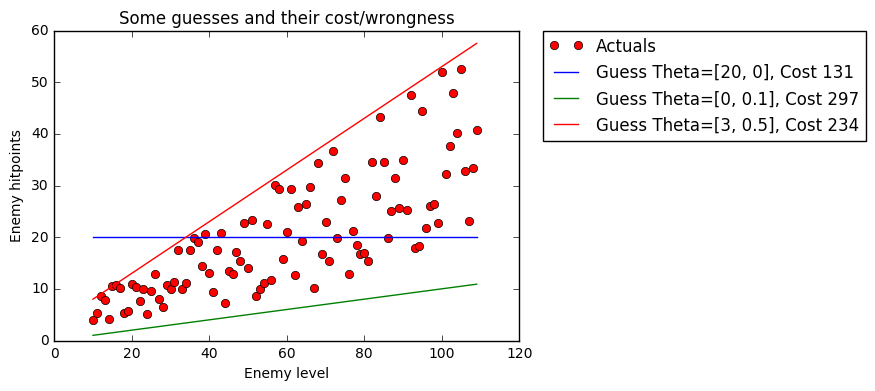

In [5]:
# Ok that doesn't look quite right (it might just by luck but probably not)...
# Next step is to figure out how not right it is. Let's create a `cost` function that will:
# Given your guess for Theta[0] and Theta[1] work out the predicted value for all y's give x's,
# compare to the actual values and tell you how wrong you are (the cost for a given Theta selection).
# Cost will be the average of all:
# (actual_value - predicted_value)^2
def cost(X, Y, Theta):
    return sum([(y - h) ** 2 for h, y in zip(hypothesis(X, Theta), Y)]) / len(X)


# Ok let's have some guesses and evaluate the cost.
guess1 = [20,0]
guess2 = [0,0.1]
guess3 = [3,0.5]


# Now let's plot our predictions against our guesses using the above values for the constants.
plt.plot(X,Y, 'ro', label='Actuals') # Actuals
plt.plot(X, hypothesis(X, guess1), label="Guess Theta=%s, Cost %.0f" %(guess1, cost(X, Y, guess1)))
plt.plot(X, hypothesis(X, guess2), label="Guess Theta=%s, Cost %.0f"%(guess2, cost(X, Y, guess2)))
plt.plot(X, hypothesis(X, guess3), label="Guess Theta=%s, Cost %.0f" %(guess3, cost(X, Y, guess3)))
            
            
plt.title("Some guesses and their cost/wrongness")
plt.xlabel("Enemy level")
plt.ylabel("Enemy hitpoints")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/root/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


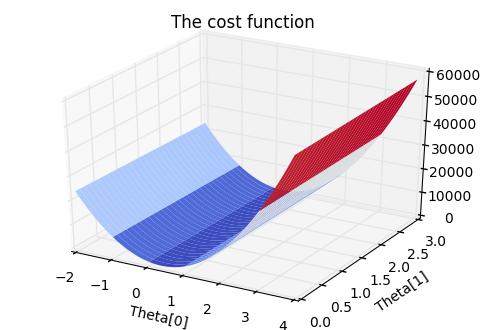

In [6]:
# Ok so better guesses have a lower `cost` so to find the best guess we try find the parameters of Theta that
# minimise the cost

# If we understand our cost function it will help in figuring out how to minimise it
# So lets take a look by plotting as a 3d surface. x = Theta[0], y = Theta[1] and z = cost(X,Y,Theta)
# Where X and Y our our fixed set of data (effectively constants)


x_t0 = [0.1 * i for i in range(-20, 40)] # plot Theta[0] between -2 and 40 in 0.1 increments
y_t1 = [0.01 * i for i in range(0, 300)] # plot Theta[1] between 0 and 1 in 0.01 increments
x_t0, y_t1 = np.meshgrid(x_t0, y_t1)
vectorized_cost_fn = np.vectorize(lambda t1, t0: cost(X,Y, [t0, t1]))
Z = vectorized_cost_fn(x_t0,y_t1) # The cost for given Theta values


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_t0, y_t1, Z, cmap=cm.coolwarm,
                       linewidth=0)
plt.title("The cost function")
plt.xlabel("Theta[0]")
plt.ylabel("Theta[1]")
fig.show()

Before we start we have y = 2.00 + 1.00x cost = 2.14e+03
Iteration 0: y = 1.99 + 0.40x cost = 8.43e+01 (learning rate = 1.00e-04)
Iteration 10: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 20: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 30: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 40: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 50: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 60: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 70: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 80: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 90: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 100: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 110: y = 1.99 + 0.31x cost = 5.16e+01 (learning rate = 1.00e-04)
Iteration 120: y = 1.99 + 0.31x cost = 5.16e+01 (learn

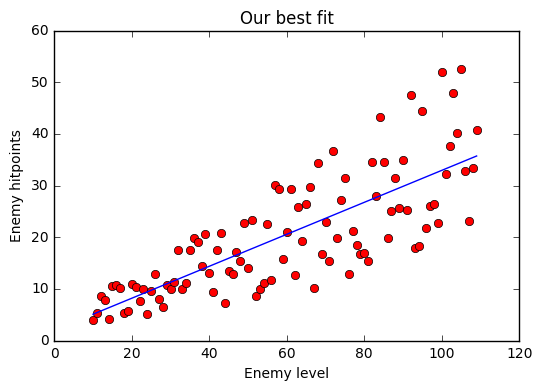

In [7]:
# So to find the minimum we need to find that dip at the very bottom of the curved surface.
# There are different ways of doing this but we are going to use gradient decent. This works
# on the fact that at the minimum the gradient is zero. To implement we chose a random start
# (random Theta[0] and Theta[1]) find the gradient of the cost function at that point and then
# move `down` the surface in the direction of the gradient a distance proportional to the
# steepness of the gradient. We then calculate the gradient of the cost function at this new spot
# and repeat for a number of iterations.

# Let's see this in action.

# This function will calculate the approx gradient for a function f(x) at x with respect to x.
# Aka How slopey is the function at this point.
def gradient_aprox(func, x, delta=0.00001):
    return (func(x + (delta/2)) - func(x - (delta/2)))/delta

# Learning rate, this is how quickly we want to "descend the slope" too quick and we over shoot and never find the minimum,
# too little it takes for ages...
LEARNING_RATE = 1e-04

# Our starting guess at Theta, we have to start somewhere
Theta = [2, 1]

# As we go we are going to keep a track of all our guesses and their cost
history = []
history.append([Theta[0],Theta[1],cost(X,Y,Theta)])

print "Before we start we have y = %.2f + %.2fx cost = %.2e" % (Theta[0], Theta[1], cost(X, Y, Theta))

# Let's run gradient decent a `few` times. In a real world problem this could be thousands to millions.
number_of_iterations = 200
for i in range(number_of_iterations):
    gradient_with_respect_to_theta = [
        gradient_aprox((lambda theta0: cost(X, Y, [theta0, Theta[1]])), Theta[0]),  # The gradient with respect to Theta[0]
        gradient_aprox((lambda theta1: cost(X, Y, [Theta[0], theta1])), Theta[1])  # The gradient with respect to Theta[1]
    ]

    # Change our guess at Theta by an amount proportional to the gradient
    Theta[0] = Theta[0] - LEARNING_RATE * gradient_with_respect_to_theta[0]
    Theta[1] = Theta[1] - LEARNING_RATE * gradient_with_respect_to_theta[1]

    # Append our current guess
    history.append([Theta[0],Theta[1],cost(X,Y,Theta)])

    if (i % 10) is 0: # Print every 100 results so we can watch
        print "Iteration %i: y = %.2f + %.2fx cost = %.2e (learning rate = %.2e)" % (i, Theta[0], Theta[1], cost(X, Y, Theta), LEARNING_RATE)

    # Now repeat that all again

print "Our final guess after %i iterations is:\n\ty = %.2f + %.2fx" % (number_of_iterations, Theta[0], Theta[1])


plt.plot(X,Y, 'ro') # Actuals
plt.plot(X, hypothesis(X, Theta), 'b-') # name="Our guess. Theta=%s"%(Theta,))],
plt.title("Our best fit")
plt.xlabel("Enemy level")
plt.ylabel("Enemy hitpoints")
plt.show()

Here is an excellent visualization of gradient descent in action from http://alykhantejani.github.io/backpropagation-part-1/
![grad descent](http://alykhantejani.github.io/images/gradient_descent_line_graph.gif)